C:\Users\212607214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\212607214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


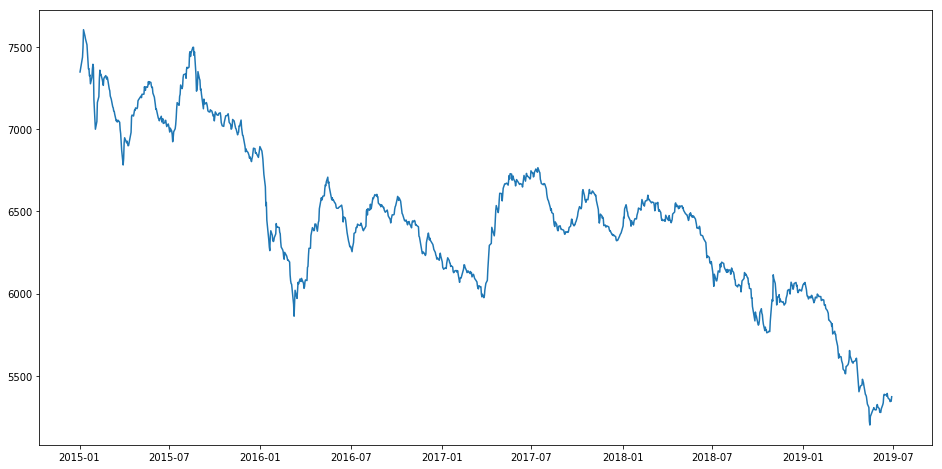

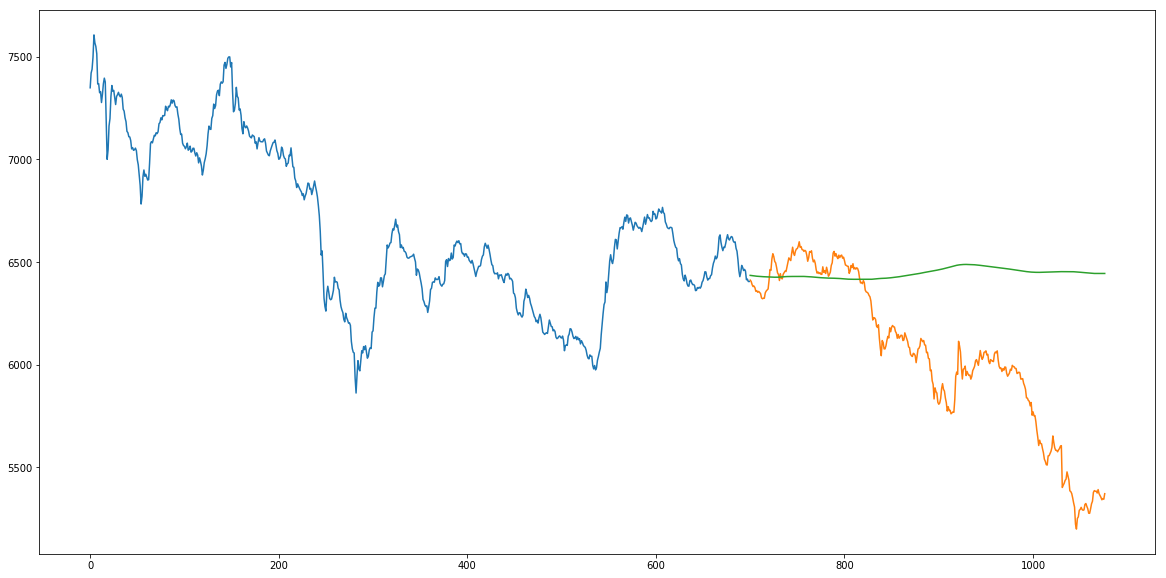

In [3]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_excel('DailyData.xlsx', 'stats')

#print the head
df.head()

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['ASPI'], label='ASPI history')

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'ASPI'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['ASPI'][i] = data['ASPI'][i]

#splitting into train and validation
train = new_data[:700]
valid = new_data[700:]

new_data.shape, train.shape, valid.shape

train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

#make predictions
preds = []
for i in range(0,377):
    a = train['ASPI'][len(train)-377+i:].sum() + sum(preds)
    b = a/377
    preds.append(b)
    
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['ASPI'])-preds),2)))
rms

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(20,10))
plt.plot(train['ASPI'])
plt.plot(valid[['ASPI', 'Predictions']])